In [97]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq


## Tx 
### Create the signal
Bi = 5 # bandwidth of sub-pulse
fs = 100 # sampling rate (2BW)
samps = 500*2 # number of samples per chirp
Tp = samps/fs # pulse duration


## RX
Nafter  = samps*5
Nbefore = samps*2
AmpNx  = 0.2
AmpRx  = 0.1

# Chirp
def w(t, Bi, Tp):
    send_chirp = np.array(np.exp(1j*2*np.pi*(Bi/Tp)*(t**2)), dtype = np.complex64)
    return np.real(send_chirp)
    

In [98]:
t = np.arange(0, Tp,1/fs); # negative time vector centering pulse at 0    

w_tx = w(t, Bi, Tp); # create the chirp from w() function


N = len(w_tx); # length of chirp

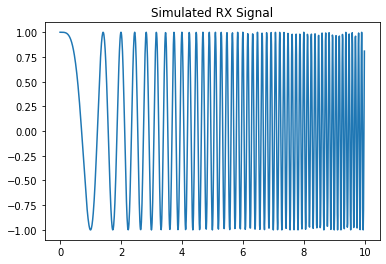

In [99]:
#plt.set(0,'defaultfigurecolor',[1 1 1]) #plot
plt.plot(t, np.real(w_tx))
plt.title('Simulated RX Signal')
#plt.ylim([-1.1, 1.2])
#plt.xlim([-.0005, .0005])

plt.show()

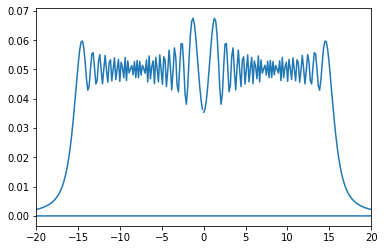

In [109]:
W_TX_F = fft(w_tx)/N;
frq = fftfreq(len(w_tx), 2*np.pi/N)  # Recuperamos las frecuencias
plt.plot(frq, abs(W_TX_F) )
plt.xlim([-20,20])
plt.show()

In [105]:
######### w_tm1 can be used as a reference signal. Now we need a simulated
######### receive signal. Must add noise and delay
w_rx  = w_tx
#w_rx  = w_tx * np.array(np.exp(1j*np.pi*2*(Bi/5)*(t)), dtype = np.complex64)
w_rx  = np.pad(w_rx, (Nbefore, Nafter), 'constant', constant_values=(0, 0))
noise = AmpNx*np.random.random_sample(len(w_rx)); # create noise vector

w_rx = AmpRx*w_rx + noise; # delay and add the noise

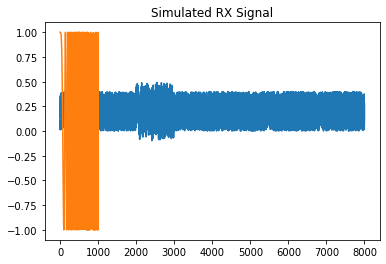

In [106]:
#plt.set(0,'defaultfigurecolor',[1 1 1]) #plot
plt.plot( np.real(w_rx))
plt.plot( np.real(w_tx))

plt.title('Simulated RX Signal')
#plt.ylim([-1.1, 1.2])
#plt.xlim([-.0005, .0005])

plt.show()


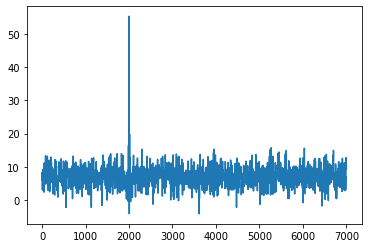

In [110]:
# Correlate
Y = np.correlate(w_rx, w_tx, 'valid')

plt.plot(Y)

/home/aalmela/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


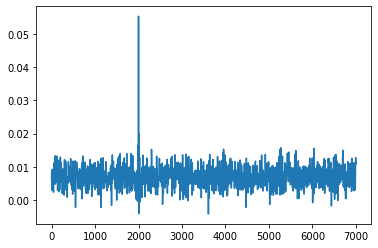

In [111]:
#--- Matched Filtering ------------------------------------------
# this section performs the matched filter using the paramters of an ideal
H = fft(w_tx)/N;

Y = list()


for i in range(len(w_rx)-N):
    X = np.conj(fft(w_rx[i:i+N])/N);
    Y.append(sum(X*H)); # perform match filter

plt.plot(Y)